# Movie Review using Regression and AI Sentiment Analysis


## Regression

This is a large table, but there are only a few things that matter to us right now. The R squared value is the first thing we will look at. In this current model our R-Squared value is at 0.862 this is an idicator of how successfull the model is with 1 being the model will perfectly predict anything we want out of our criteria. With our model at .862 that means that the majority of the time, the model will accurately predict the outcome.

Next is our P>|t| value. This indicates which variables are successfully contrubuting to the accuracy of our model. Here we can find that budget and opening weekend are two of the most important contrubutors with number of votes coming in right behind them as essential. Next are the user rating and runtime values. These are still a valuable metrics even though they have some variablility in how well they contributes to the model. The least contributing is user rating.

Last we should look at the notes at the bottom. These can give us information like in this case budget opening weekend and votes may be overlapping. 

```
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            gross_sales   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     106.1
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           4.96e-35
Time:                        11:43:56   Log-Likelihood:                -1784.6
No. Observations:                  91   AIC:                             3581.
Df Residuals:                      85   BIC:                             3596.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5.141e+06   8.68e+07     -0.059      0.953   -1.78e+08    1.67e+08
user_rating      1.557e+07   1.03e+07      1.517      0.133   -4.84e+06     3.6e+07
budget              1.0672      0.201      5.322      0.000       0.669       1.466
opening_weekend     5.2242      0.504     10.358      0.000       4.221       6.227
votes             135.7783     41.276      3.289      0.001      53.710     217.847
runtime         -1.116e+06   6.51e+05     -1.716      0.090   -2.41e+06    1.77e+05
==============================================================================
Omnibus:                       10.977   Durbin-Watson:                   2.530
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               30.894
Skew:                          -0.047   Prob(JB):                     1.96e-07
Kurtosis:                       5.853   Cond. No.                     9.53e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.53e+08. This might indicate that there are
strong multicollinearity or other numerical problems.

```
## AI Sentiment Analysis

### Sentiment movie description vs gross sales

I found this interesting because it showed a few things. First of all the Sentiment Analysis tends to trend in either heavy positive, negative, straight neutral. Another thing that struck me was how few positive leaning descriptions there were in 2010. This could be because descriptions of movies try to be factual and thus be neutral. This theory of mine was debunked because most of the descriptions were negatively skewed. One possible reason for this could be that descriptions try to be exciting and that wording could be taken by the sentiment AI as being negative. 

Another observation about this graph is that the movies that had the highest gross sales for 2010 Toy Story 3 and Alice in Wonderland both had neutral reviews. While the next 4 highest grossing had negative descritions, and no movies with positive descriptions were making significant money.

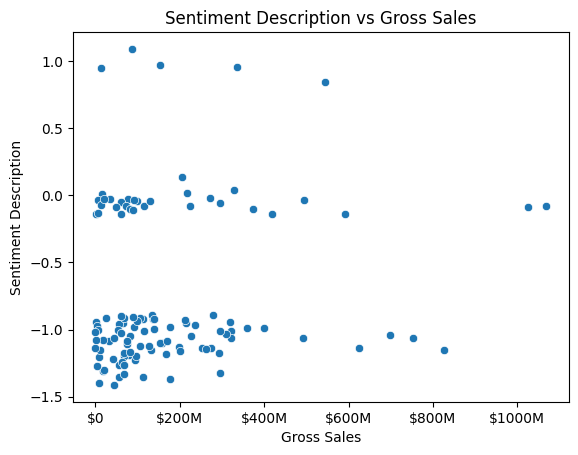


### Sentiment movie title vs gross sales

This graph was similar to the previous but it did its analysis on the titles of movies instead of the descriptions. The results of this graph surprised me. the vast majority of movies had neutral titles. While almost the opposite result of the previous graph, neutral titles and positive titles were the only ones with a chance to make significant money. Another thing that surprised me was Harry Potter and the Deathly Hallows Part 1 the 4th highest grossing film had a neutral to positive title sentiment. I would've thought that with death being included in the title it would be negative, perhaps Harry Potter has more of an impact than death in this case.

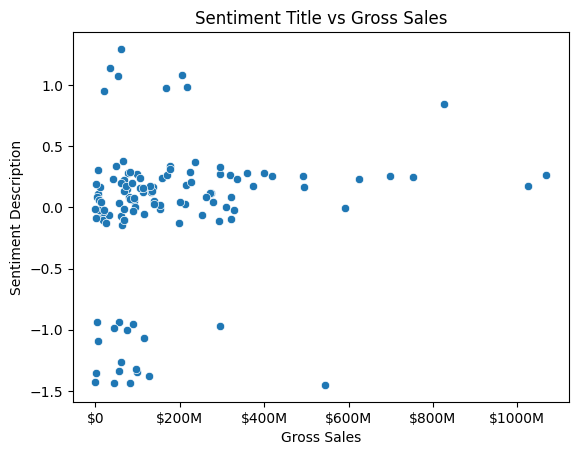

### Sentiment movie title Each Month

Last this graph shows the frequency of each title sentiment per month. Which right away told me that the boring titled movies are released in bulk at the beginning of the year. However with the findings of previous graph we know that the straightforward neutral titles make more money on average. This graph lined slightly witha theory of mine that more positive titled movies would be released during or right before the Holliday season. Although there were some movies that were positive in sentiment released before the Holliday season the majority were neutral. 

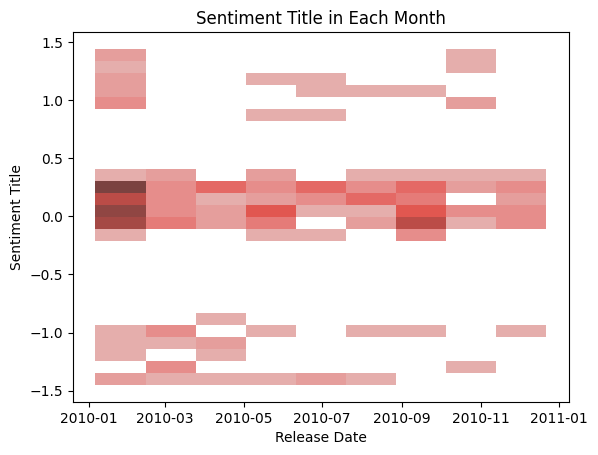



In [50]:
#%pip install sentencepiece
#%pip install transformers
#%pip install protobuf
#%pip install torch

In [51]:
import json
import pymongo
import certifi
import pandas as pd
import re
import seaborn as sea
from matplotlib import pyplot
import statsmodels.formula.api
import transformers

In [52]:
# Demonstration of how to load a file that contains secrets without accidentally leaking those secrets
with open('C:\\Users\\CBema\\OneDrive\\Bellevue College\\2023 Fall\\DATA 320 Data Acquisition & Mngmt\\Week 8\\SecretFile.json') as f:
    data = json.load(f)

    secret_key = data['mongodb']

# We can safely print the length of the secret key. That won't leak any sensitive information.
print(f"My secret key is {len(secret_key)} characters in length.")

My secret key is 70 characters in length.


In [53]:
# Connect to the database using known good certificates
client = pymongo.MongoClient(secret_key, tlsCAFile=certifi.where())

# Fetch the database named "TestCollection"
da320_database = client.TestDatabase

# Within the database we have "collections". Think of them as tables in SQL.
allCollections = da320_database.list_collection_names()

# Here is the list of collections within my database
print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allCollections}")

Using MongoDB version 6.0.11.
This database has the collections ['TestCollection', 'MetacriticMovies', 'Pipeline_2010', 'Van_Damme_Pipeline', 'Seagal_Pipeline', 'Van_Damme_Seagal_Pipeline', 'Travolta_Pipeline', 'Scorsese_Spielburg_Pipeline', 'IMDB_Pipeline_View']


In [54]:
# Importing the pipeline data into a pandas dataframe
imdbCursor = da320_database.Pipeline_2010.find({"release_year": 2010})
imdb_2010 = pd.DataFrame(imdbCursor)

# Taking only movies released in 2010
yearQuery = {'release_date': re.compile(r"2010") }
# Retrieve queried records
cursor = da320_database["MetacriticMovies"].find(yearQuery)
# Convert this information into a Pandas dataframe
meta2010 = pd.DataFrame(cursor)

meta2010.score = pd.to_numeric(meta2010.score, errors='coerce')
meta2010.release_date = pd.to_datetime(meta2010.release_date, errors='coerce')

#meta2010.head()
#imdb_2010.head()

In [55]:
#Merging the two datasets
merged_data = pd.merge(imdb_2010, meta2010, how="inner", on="title")
#merged_data.head()

In [56]:
ols_model = statsmodels.formula.api.ols(
    formula="gross_sales ~ user_rating + budget + opening_weekend + votes + runtime",
    data=merged_data).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:            gross_sales   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     106.1
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           4.96e-35
Time:                        11:43:56   Log-Likelihood:                -1784.6
No. Observations:                  91   AIC:                             3581.
Df Residuals:                      85   BIC:                             3596.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5.141e+06   8.68e+07     

In [57]:
#Distilbert HuggingFace Sentiment AI Integration

MODEL = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_task = transformers.pipeline("sentiment-analysis", model=MODEL,
    tokenizer=transformers.AutoTokenizer.from_pretrained(MODEL))

# Test Cases
#print(sentiment_task("Covid cases are increasing fast!"))



In [101]:
# Transform sentiment into a single number from a range of -1.5 to 1.5
def calculate_sentiment(text):
    if text is None:
        return 0
    sentiment = sentiment_task(text)
    if sentiment[0]['label'] == 'negative':
        return 0 - sentiment[0]['score'] - 0.5
    elif sentiment[0]['label'] == 'neutral':
        return sentiment[0]['score'] - 0.5
    elif sentiment[0]['label'] == 'positive':
        return 1 + sentiment[0]['score'] - 0.5
    

print(calculate_sentiment("I came down with the flu and I'm Feeling really sick."))
print(calculate_sentiment("Today is my birthday!")) 
print(calculate_sentiment("The book Moby Dick was written by Herman Melville."))
print(calculate_sentiment(None))   

print(calculate_sentiment("Harry Potter and the Deathly Hallows Part 1"))
print(calculate_sentiment("Inception"))

-1.408667266368866
1.2431761026382446
0.2737168073654175
0
0.24037474393844604
0.8455919325351715


In [59]:
# adding a new column with the description sentiment data
sentiment_column = merged_data.apply(lambda row : calculate_sentiment(row.get('description')), axis = 1)
merged_data["sentimentDescription"] = sentiment_column

# adding a new column with the description sentiment data
sentiment_column = merged_data.apply(lambda row : calculate_sentiment(row.get('title')), axis = 1)
merged_data["sentimentTitle"] = sentiment_column

merged_data.head()

,_id_x,title,runtime,user_rating,votes,budget,opening_weekend,gross_sales,release_date_x,genres,...,release_month,release_day,_id_y,movie_id,release_date_y,description,score,thumbnail,sentimentDescription,sentimentTitle
0,6525981fb8365a8ea5ed82cd,The Losers,97,6,100516,25000000.0,9406348.0,NaN,2010-04-20,"[Action, Adventure, Crime, Mystery, Thriller]",...,4,20,652598d1b8365a8ea5edccab,15985,2010-04-23,"An explosive tale of double cross and revenge,...",44,https://static.metacritic.com/images/products/...,-1.197491,-1.181894
1,6525981fb8365a8ea5ed82d1,Blue Valentine,112,7,195533,3500000.0,193728.0,16566240.0,2010-01-24,"[Drama, Romance]",...,1,24,652598d1b8365a8ea5edcb6c,15666,2010-12-29,Blue Valentine is the story of love found and ...,81,https://static.metacritic.com/images/products/...,0.009839,-0.059372
2,6525981fb8365a8ea5ed82df,Leap Year,100,6,103456,19000000.0,2727.0,NaN,2010-01-06,"[Comedy, Romance]",...,1,6,652598d1b8365a8ea5edccdf,16037,2010-01-08,When their four-year anniversary passes withou...,33,https://static.metacritic.com/images/products/...,-0.100683,-0.062749
3,6525981fb8365a8ea5ed8375,Leap Year,94,5,2556,NaN,NaN,NaN,2010-05-17,"[Drama, Romance]",...,5,17,652598d1b8365a8ea5edccdf,16037,2010-01-08,When their four-year anniversary passes withou...,33,https://static.metacritic.com/images/products/...,-0.100683,-0.062749
4,6525981fb8365a8ea5ed82f8,All Good Things,101,6,56106,NaN,37172.0,NaN,2010-11-05,"[Crime, Drama, Mystery, Romance, Thriller]",...,11,5,652598d1b8365a8ea5edcc33,15865,2010-12-03,All Good Things is a love story and murder mys...,57,https://static.metacritic.com/images/products/...,0.022948,1.347330


In [60]:
# Currency formatter created by Theodore Spence
def format_currency(amount, _):
    if amount > 1_000_000_000_000:
        return f"${round(amount / 1_000_000_000_000)}T"
    elif amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}"

Text(0.5, 0, 'Gross Sales')

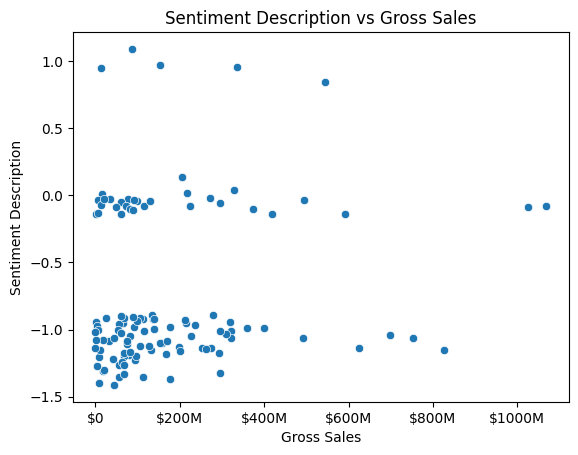

In [64]:
# comparing sentiment descrition vs Gross sales

GrossChart = sea.scatterplot(data=merged_data, x="gross_sales", y="sentimentDescription",)
pyplot.gca().xaxis.set_major_formatter(format_currency)
pyplot.title("Sentiment Description vs Gross Sales")
pyplot.ylabel("Sentiment Description")
pyplot.xlabel("Gross Sales")


Text(0.5, 0, 'Gross Sales')

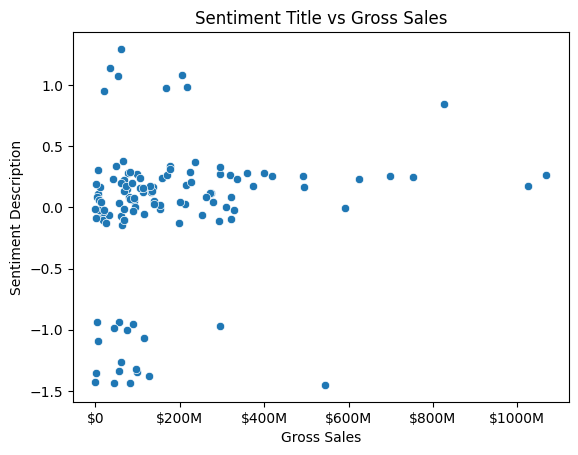

In [69]:
# comparing sentiment title vs Gross sales

GrossChart = sea.scatterplot(data=merged_data, x="gross_sales", y="sentimentTitle",)
pyplot.gca().xaxis.set_major_formatter(format_currency)
pyplot.title("Sentiment Title vs Gross Sales")
pyplot.ylabel("Sentiment Description")
pyplot.xlabel("Gross Sales")

Text(0.5, 0, 'Release Date')

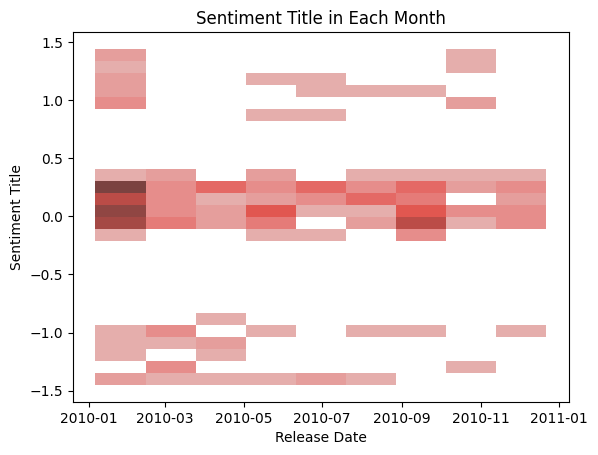

In [99]:
sea.hls_palette(3)
HistChart = sea.histplot(data=merged_data, x="release_date_x", y="sentimentTitle")
pyplot.title("Sentiment Title in Each Month")
pyplot.ylabel("Sentiment Title")
pyplot.xlabel("Release Date")
